In [1]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import ExtendedBinnedNLL, LeastSquares
from scipy.stats import norm
import matplotlib.ticker as ticker

#curva calibrazione 900mm2
a = 0.11e-2
erra = 14e-7
b = -1.31e-2
errb = 7e-3


raw_data = np.loadtxt(r"C:\Users\lenovo\Desktop\AlfaRuth24-25_S1\rutherford\rate_senza_oro1.dat")
raw_data2 = np.loadtxt(r"C:\Users\lenovo\Desktop\AlfaRuth24-25_S1\rutherford\rate_senza_oro2.dat")

data=[]

data1 = []
data2=[]

data3=[]
data4=[]

signal=[]
signal1=[]
signal2=[]

for i in range(len(raw_data)):
    for j in range(int(raw_data[i])):
        data1.append(i)
        data.append(i)
        
data2 = np.array(data1)

for i in range(len(data1)):
    if data2[i] > max(0, np.argmax(raw_data))-1000 and data2[i] < np.argmax(raw_data)+1000 : signal1.append(data2[i])


for i in range(len(raw_data2)):
    for j in range(int(raw_data2[i])):
        data3.append(i)
        data.append(i)
        
data4 = np.array(data3)

for i in range(len(data4)):
    if data4[i] > max(0, np.argmax(raw_data))-1000 and data4[i] < np.argmax(raw_data)+1000 : signal2.append(data4[i])



data_ult = np.array(data)

for i in range(len(data_ult)):
    if data_ult[i] > max(0, np.argmax(raw_data))-100 and data_ult[i] < np.argmax(raw_data)+100 : signal.append(data_ult[i])

 
#plt.hist(signal)
#plt.hist(signal1)
#plt.hist(signal2)
#plt.show()
#print(np.argmax(raw_data))
    
bin_content, bin_edges= np.histogram(signal, bins=10)

N=sum(raw_data)
    
def model(x, N, mu, sigma):
    return N*norm.cdf(x, loc = mu, scale = sigma)
N_ext = 0
for i in range(4750, 4850): #picco1 (più a dx)
    N_ext = N_ext + raw_data[i]
    
    
numbins=[]
chi2=[]

for nbins in range(10, 100):
       
    bin_content, bin_edges = np.histogram(signal, bins = nbins)
    
    costf = ExtendedBinnedNLL(bin_content, bin_edges, model)
    
    my_minuit = Minuit(costf, N = N_ext,  mu = 4800, sigma = 20)
    my_minuit.migrad()
        
    # print(my_minuit.valid)
    if ((my_minuit.valid == True) and (my_minuit.fval/my_minuit.ndof > 0.1 )):
        chi2.append(my_minuit.fval/my_minuit.ndof)
        numbins.append(nbins)
    
    
    #print(numbins[np.array(chi2).argmin()])

index = np.array(chi2).argmin() #dove c'è il fit migliore
nbins = numbins[index]
print(nbins)
bin_content, bin_edges = np.histogram(signal, bins = nbins)
    
N_events = sum(bin_content)
    
costf = ExtendedBinnedNLL(bin_content, bin_edges, model)
    
my_minuit = Minuit(costf, N = N_ext,  mu = 4800, sigma = 20)
    
my_minuit.migrad()
display(my_minuit)


ch_senza=my_minuit.values["mu"]
En_senza = a*ch_senza+b
err_senza=a*my_minuit.errors["mu"]

print(my_minuit.values["mu"])
print(En_senza)



E VariableMetricBuilder Initial matrix not pos.def.
87


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 271.7 (χ²/ndof = 3.2)      │              Nfcn = 418              │
│ EDM = 3.86e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N     │    986    │    31     │            │            │         │         │       │
│ 1 │ mu    │ 4.9513e3  │ 0.0007e3  │            │            │         │         │       │
│ 2 │ sigma │   22.2    │    0.5    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │     N    mu sigma │
├───────┼───────────────────┤
│     N │   986   0.0  0.07 │
│    mu │   0.0 0.506  0.00 │
│ sigma │  0.07  0.00 0.262 │
└───────┴───────────────────┘

4951.278784138506
5.433306662552358


In [2]:
raw_data3 = np.loadtxt(r"C:\Users\lenovo\Desktop\AlfaRuth24-25_S1\rutherford\spessore_oro.dat")

data_con=[]
data_def=[]

signal_con=[]


for i in range(len(raw_data3)):
    for j in range(int(raw_data3[i])):
        data_con.append(i)
        
data_def = np.array(data_con)

for i in range(len(data_con)):
    if data_def[i] > 2000 and data_def[i] < 6000 : signal_con.append(data_def[i])


#plt.hist(signal_con)
#plt.show()
#print(np.argmax(raw_data))
    
bin_content, bin_edges= np.histogram(signal_con, bins=10)

N=sum(raw_data3)
    
def model(x, N, mu, sigma):
    return N*norm.cdf(x, loc = mu, scale = sigma)
N_ext = 0
for i in range(3000, 5550): #picco1 (più a dx)
    N_ext = N_ext + raw_data[i]
    
    
numbins=[]
chi2=[]

for nbins in range(10, 100):
       
    bin_content, bin_edges = np.histogram(signal_con, bins = nbins)
    
    costf = ExtendedBinnedNLL(bin_content, bin_edges, model)
    
    my_minuit2 = Minuit(costf, N = N_ext,  mu = 4800, sigma = 20)
    my_minuit2.migrad()
        
    # print(my_minuit.valid)
    if ((my_minuit2.valid == True) and (my_minuit2.fval/my_minuit2.ndof > 0.1 )):
        chi2.append(my_minuit2.fval/my_minuit2.ndof)
        numbins.append(nbins)
    
    
    #print(numbins[np.array(chi2).argmin()])

index = np.array(chi2).argmin() #dove c'è il fit migliore
nbins = numbins[index]
print(nbins)
bin_content, bin_edges = np.histogram(signal_con, bins = nbins)
    
N_events = sum(bin_content)
    
costf = ExtendedBinnedNLL(bin_content, bin_edges, model)
    
my_minuit2 = Minuit(costf, N = N_ext,  mu = 4800, sigma = 20)
    
my_minuit2.migrad()
display(my_minuit2)


ch_con=my_minuit2.values["mu"]
En_con = a*ch_con+b
err_con=a*my_minuit2.errors["mu"]

print(my_minuit2.values["mu"])
print(En_con)

98


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 635.8 (χ²/ndof = 6.7)      │              Nfcn = 302              │
│ EDM = 1.02e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N     │  1.093e3  │  0.035e3  │            │            │         │         │       │
│ 1 │ mu    │  4.132e3  │  0.034e3  │            │            │         │         │       │
│ 2 │ sigma │    969    │    32     │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────┐
│       │        N       mu    sigma │
├───────┼────────────────────────────┤
│     N │ 1.21e+03    0.1e3    0.3e3 │
│    mu │    0.1e3 1.16e+03    0.1e3 │
│ sigma │    0.3e3    0.1e3 1.05e+03 │
└───────┴────────────────────────────┘

4132.229107315576
4.532352018047134


In [3]:
dE = abs(En_con-En_senza)
dE_err = err_con+err_senza

pf_Au = 2.227e2 #Mev/g/cm2
dens_Au = 19320e-3  #g/cm3 
d = dE/dens_Au/pf_Au*10**4 #um
err_d = dE_err/dens_Au/pf_Au*10**4

print(f"spessore strato oro: ({d} +- {err_d}) um")

spessore strato oro: (2.0939947540704194 +- 0.08897637000689856) um


In [53]:
t = [183393.391, 108507.349, 1704958.073, 612618.035] #secondi
h = [48, 41.6, 43.8, 39.4] #mm

Rate = []
err_Rate=[]

for l in range(len(h)):
    dat1 = []
    total=[]

    raw = np.loadtxt(r"C:\Users\lenovo\Desktop\AlfaRuth24-25_S1\rutherford\rutherford_" + str(h[l]) + ".dat")


    for i in range(len(raw)):
        for j in range(int(raw[i])):
            dat1.append(i)
        
    dat = np.array(dat1)

    for i in range(len(dat)):
        if dat[i] > 4250 and dat[i] < 6000 : total.append(dat[i])

    #plt.hist(total)
    #plt.show()
    bin_content, bin_edges = np.histogram(total, bins = 10)
    Cont = sum(bin_content)
    print(Cont, t[l]/3600)
    Rate.append(Cont/t[l]*60*60) #N/h
    err_Rate.append(np.sqrt(Cont)/t[l]*3600)

#print(list(map(lambda x: x/3600, t)))
#print(Rate)

591 50.94260861111111
415 30.140930277777777
5847 473.59946472222225
1974 170.1716763888889


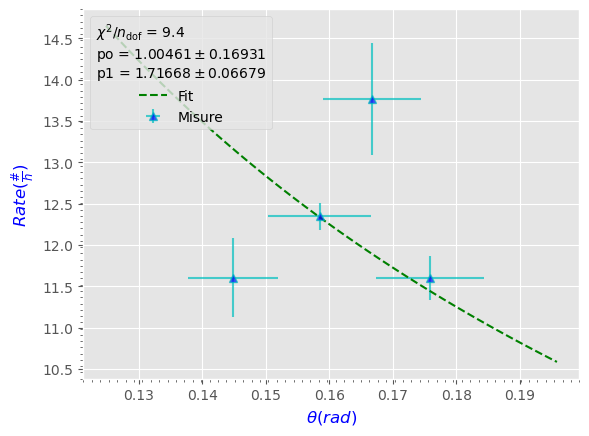

8.297144969836875
0.4063130204170233
9.551637458381855
0.44373805063717353
9.08007286402672
0.4661584621184377
10.074332730102768
0.4909003095094997


In [81]:
d = 7

angolo = list(map(lambda x: np.arctan(d/x), h))
#print(angolo)

#errangolo = list(map(lambda x: x/100, angolo))
errangolo = [0.0070915, 0.00774469, 0.00813600, 0.0085678267]


err=[]

for i in range(len(h)):
    err.append(np.sqrt(err_Rate[i]**2+errangolo[i]**2))

    
f = lambda x, po, p1: po*np.sin(x)/(np.sin(x/2))**p1

#po_ext = Ro * () * 900 *  


least_squares = LeastSquares (angolo, Rate, err, f)

m = Minuit (least_squares, po=0, p1=4) 
m.migrad ()  
m.hesse ()


x2 = np.linspace(angolo[0]-0.02, angolo[-1]+0.02, 100)

fig, ax = plt.subplots()

plt.errorbar(angolo, Rate, xerr= list(map(lambda x: x, errangolo)), yerr= list(map(lambda x: x, err_Rate)), linestyle="None", marker="^", color="k", mec="c", mfc="b", ecolor="c", label="Misure", alpha=.7)
plt.plot(x2, f(x2, m.values[0], m.values[1]), linestyle="--", color="green", label="Fit")
plt.grid("on")
plt.xlabel(r"$\theta (rad) $", color="b")
plt.ylabel(r"$ Rate (\frac{\#}{h}) $", color="b", rotation=90)

fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m.fmin.reduced_chi2:.1f}",
]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.5f} \\pm {e:.5f}$")

plt.legend(title="\n".join(fit_info), frameon=True, loc = "upper left")

plt.style.use("ggplot")

#plt.xlim(10, 80)
# For the x-axis
ax.xaxis.set_minor_locator(ticker.LinearLocator(60))
#ax.xaxis.set_major_locator(ticker.LinearLocator(8))
# For the y-axis
ax.yaxis.set_minor_locator(ticker.LinearLocator(60))
#ax.yaxis.set_major_locator(ticker.LinearLocator(8))

plt.show()

for i in range(len(angolo)):
    print(angolo[i]*360/2/np.pi)
    print(errangolo[i]*360/2/np.pi)
